In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

In [18]:
import os

current_dir = os.getcwd()
print(current_dir)


c:\Users\NIKHILA MANOJ\OneDrive\Desktop\pro


In [28]:
import os

current_dir = os.getcwd()
folder_list = []

for folder in os.listdir(current_dir):
    folder_path = os.path.join(current_dir, folder)
    if os.path.isdir(folder_path):
        folder_list.append((folder, folder_path))

print(folder_list)



[('Test', 'c:\\Users\\NIKHILA MANOJ\\OneDrive\\Desktop\\pro\\Test'), ('Train', 'c:\\Users\\NIKHILA MANOJ\\OneDrive\\Desktop\\pro\\Train'), ('Validation', 'c:\\Users\\NIKHILA MANOJ\\OneDrive\\Desktop\\pro\\Validation')]


In [24]:
import cv2
import mediapipe as mp
import pandas as pd  
import os
import numpy as np 

In [29]:
def image_processed(file_path):
    
    # reading the static image
    hand_img = cv2.imread(file_path)

    # Image processing
    # 1. Convert BGR to RGB
    img_rgb = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)

    # 2. Flip the img in Y-axis
    img_flip = cv2.flip(img_rgb, 1)

    # accessing MediaPipe solutions
    mp_hands = mp.solutions.hands

    # Initialize Hands
    hands = mp_hands.Hands(static_image_mode=True,
    max_num_hands=2, min_detection_confidence=0.7)

    # Results
    output = hands.process(img_flip)

    hands.close()

    try:
        data = output.multi_hand_landmarks[0]
        #print(data)

        data = str(data)

        data = data.strip().split('\n')

        garbage = ['landmark {', '  visibility: 0.0', '  presence: 0.0', '}']

        without_garbage = []

        for i in data:
            if i not in garbage:
                without_garbage.append(i)

        clean = []

        for i in without_garbage:
            i = i.strip()
            clean.append(i[2:])

        for i in range(0, len(clean)):
            clean[i] = float(clean[i])

        
        return(clean)

    except:
        return(np.zeros([1,63], dtype=int)[0]) # here 63 is the no of columns 


In [31]:
def make_csv():
    
    mypath = 'Test\\'
    file_name = open('final.csv', 'a')

    for each_folder in os.listdir(mypath):
        if '._' in each_folder:
            pass

        else:
            for each_number in os.listdir(mypath + '/' + each_folder):
                if '._' in each_number:
                    pass
                
                else:
                    label = each_folder

                    file_loc = mypath + '/' + each_folder + '/' + each_number
                    print(file_loc)
                    data = image_processed(file_loc)
                    
                    try:
                        for i in data:
                            file_name.write(str(i))
                            file_name.write(',')

                        file_name.write(label)
                        file_name.write('\n')
                    
                    except:
                        file_name.write('0')
                        file_name.write(',')

                        file_name.write('None')
                        file_name.write('\n')
       
    file_name.close()
    print('Data Created !!!')

if __name__ == "__main__":
    make_csv()

Test\/0/0_1.jpg


C:\Users\NIKHILA MANOJ\AppData\Roaming\Python\Python310\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Test\/0/0_10.jpg
Test\/0/0_100.jpg
Test\/0/0_101.jpg
Test\/0/0_102.jpg
Test\/0/0_103.jpg
Test\/0/0_104.jpg
Test\/0/0_105.jpg
Test\/0/0_106.jpg
Test\/0/0_107.jpg
Test\/0/0_108.jpg
Test\/0/0_109.jpg
Test\/0/0_11.jpg
Test\/0/0_110.jpg
Test\/0/0_111.jpg
Test\/0/0_112.jpg
Test\/0/0_113.jpg
Test\/0/0_114.jpg
Test\/0/0_115.jpg
Test\/0/0_116.jpg
Test\/0/0_117.jpg
Test\/0/0_118.jpg
Test\/0/0_119.jpg
Test\/0/0_12.jpg
Test\/0/0_120.jpg
Test\/0/0_121.jpg
Test\/0/0_122.jpg
Test\/0/0_123.jpg
Test\/0/0_124.jpg
Test\/0/0_125.jpg
Test\/0/0_126.jpg
Test\/0/0_127.jpg
Test\/0/0_128.jpg
Test\/0/0_129.jpg
Test\/0/0_13.jpg
Test\/0/0_130.jpg
Test\/0/0_131.jpg
Test\/0/0_132.jpg
Test\/0/0_133.jpg
Test\/0/0_134.jpg
Test\/0/0_135.jpg
Test\/0/0_136.jpg
Test\/0/0_137.jpg
Test\/0/0_138.jpg
Test\/0/0_139.jpg
Test\/0/0_14.jpg
Test\/0/0_140.jpg
Test\/0/0_141.jpg
Test\/0/0_142.jpg
Test\/0/0_143.jpg
Test\/0/0_144.jpg
Test\/0/0_145.jpg
Test\/0/0_146.jpg
Test\/0/0_147.jpg
Test\/0/0_148.jpg
Test\/0/0_149.jpg
Test\/0/0_15.jp

In [2]:
import pandas as pd

def get_num_columns(csv_file):
    df = pd.read_csv(csv_file)
    num_columns = df.shape[1]
    return num_columns

# Example usage
csv_file_path = 'final.csv'  # Replace with the path to your CSV file
num_columns = get_num_columns(csv_file_path)
print("Number of columns:", num_columns)


Number of columns: 64


In [4]:
import pandas as pd

def get_num_rows(csv_file):
    df = pd.read_csv(csv_file)
    num_rows = df.shape[0]
    return num_rows

# Example usage
csv_file_path = 'final.csv'  # Replace with the path to your CSV file
num_rows = get_num_rows(csv_file_path)
print("Number of rows:", num_rows)


Number of rows: 28699


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('final.csv',on_bad_lines='skip')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'}) # here 63 is no of columns of input
df

print("Uncleaned dataset shape =", df.shape)
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

df

print("Cleaned dataset shape =", df.shape)
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Uncleaned dataset shape = (28699, 64)
Number of null values = 482
Cleaned dataset shape = (28217, 64)
Features shape = (28217, 63)
Labels shape = (28217,)


In [3]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
clssifier = RandomForestClassifier( criterion = 'entropy', random_state = 0, max_depth=5)
clssifier.fit(x_train, y_train)
print("Training score =", clssifier.score(x_train, y_train))
y_pred=clssifier.predict(x_test)
print("Testing score=",accuracy_score(y_test,y_pred))
f1 = f1_score(y_test, y_pred, average='micro')
print("f1_score=",f1)



Training score = 0.9266380188721038
Testing score= 0.9225726435152374
f1_score= 0.9225726435152374


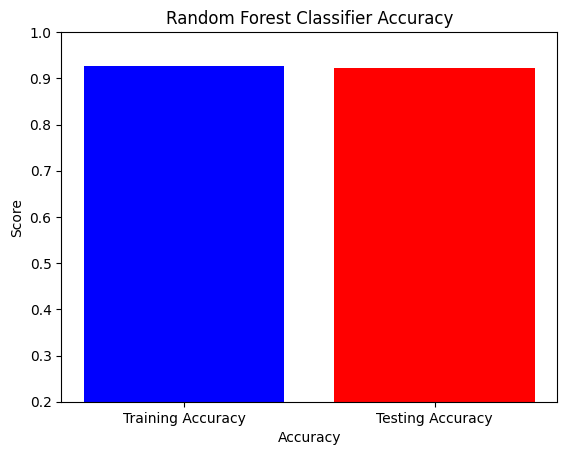

In [64]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier with adjusted hyperparameters
classifier = RandomForestClassifier(criterion='entropy', random_state=0, max_depth=5)
classifier.fit(x_train, y_train)

# Get the predicted labels for training and testing data
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Calculate the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the accuracies
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [train_accuracy, test_accuracy]

colors = ['blue', 'red'] 

plt.bar(labels, scores, color=colors)
plt.ylim(0.2, 1.0)  # Set the y-axis limits
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('Random Forest Classifier Accuracy')
plt.show()


In [4]:
from sklearn.tree import DecisionTreeClassifier
lassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=7)
lassifier.fit(x_train, y_train)
print("Training score =", lassifier.score(x_train, y_train))
y_pred=lassifier.predict(x_test)
print("Testing score=",accuracy_score(y_test,y_pred))
f1 = f1_score(y_test, y_pred, average='micro')
print("f1_score=",f1)


Training score = 0.921056129003677
Testing score= 0.9080439404677534
f1_score= 0.9080439404677534


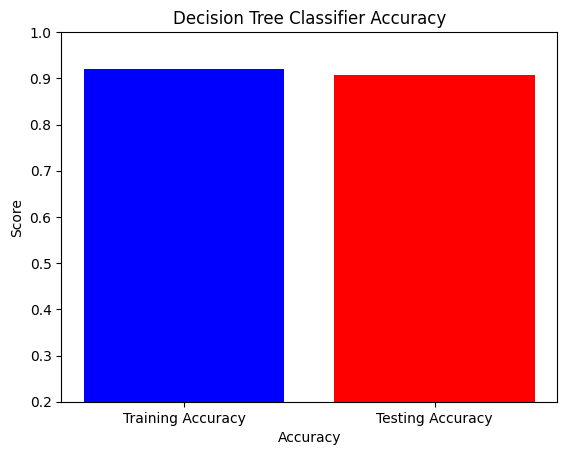

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier with adjusted hyperparameters
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=7)
classifier.fit(x_train, y_train)

# Get the predicted labels for training and testing data
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Calculate the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the accuracies
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [train_accuracy, test_accuracy]

plt.bar(labels, scores, color=['blue', 'red'])
plt.ylim(0.2, 1.0)  # Set the y-axis limits
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('Decision Tree Classifier Accuracy')
plt.show()


In [5]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifie = GaussianNB()
classifie.fit(x_train, y_train)
print("Training score =", classifie.score(x_train, y_train))
y_pred=classifie.predict(x_test)
print("Testing score=",accuracy_score(y_test,y_pred))
f1 = f1_score(y_test, y_pred, average='micro')
print("f1_score=",f1)


Training score = 0.8511939042218579
Testing score= 0.8400070871722183
f1_score= 0.8400070871722183


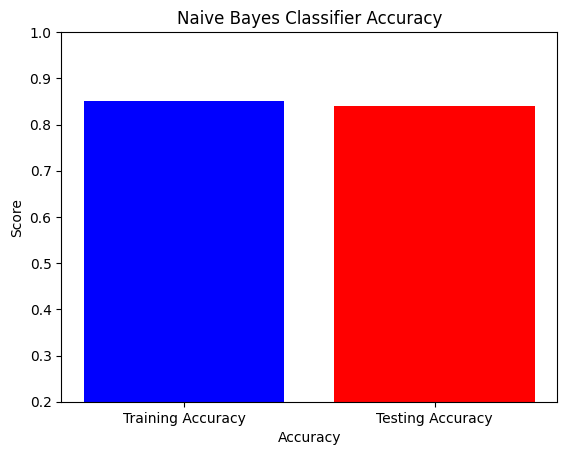

In [65]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Get the predicted labels for training and testing data
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Calculate the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the accuracies
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [train_accuracy, test_accuracy]

plt.bar(labels, scores, color=['blue', 'red'])
plt.ylim(0.2, 1.0)  # Set the y-axis limits
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('Naive Bayes Classifier Accuracy')
plt.show()


In [6]:
from sklearn.svm import SVC
# SVM model...
svm = SVC(C=1, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)
print("Training score =", svm.score(x_train, y_train))
y_pred = svm.predict(x_test)
print("Testing score =", accuracy_score(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average='micro')
print("f1_score=",f1)
# f1, recall, precision

Training score = 0.9863553803216232
Testing score = 0.9847625797306875
f1_score= 0.9847625797306875


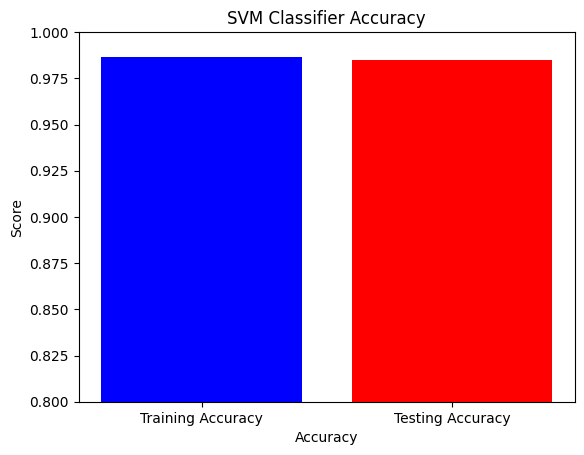

In [67]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm = SVC(C=1, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

# Get the predicted labels for training and testing data
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

# Calculate the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the accuracies
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [train_accuracy, test_accuracy]

plt.bar(labels, scores, color=['blue', 'red'])
plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('SVM Classifier Accuracy')
plt.show()


In [7]:
#KNN model ..
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
print("Training score =", classifier.score(x_train, y_train))
y_pred=classifier.predict(x_test)
print("Testing score=",accuracy_score(y_test,y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

f1, recall, precision

Training score = 0.9806848890267134
Testing score= 0.9794472005669738


(0.9794472005669738, 0.9794472005669738, 0.9794472005669738)

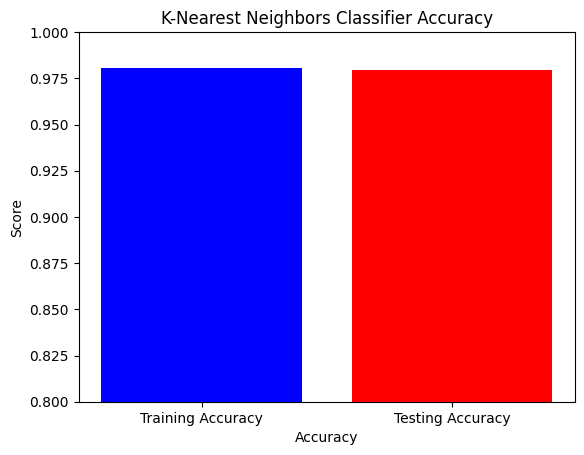

In [68]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
classifier = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

# Get the predicted labels for training and testing data
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Calculate the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the accuracies
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [train_accuracy, test_accuracy]

plt.bar(labels, scores, color=['blue', 'red'])
plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors Classifier Accuracy')
plt.show()


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

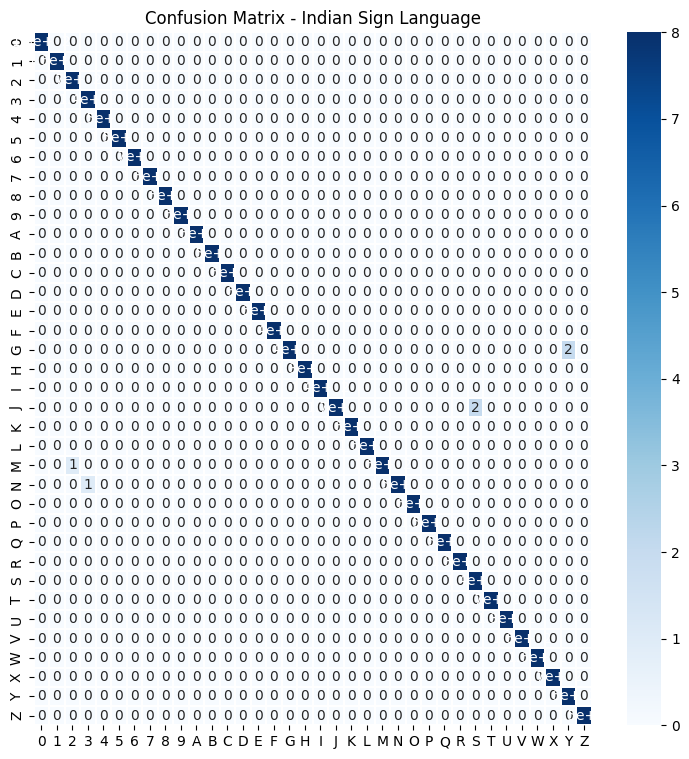

In [42]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]
print(labels)
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

In [69]:
from sklearn.metrics import confusion_matrix

# Train the Random Forest Classifier
classifier = RandomForestClassifier(criterion='entropy', random_state=0, max_depth=5)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

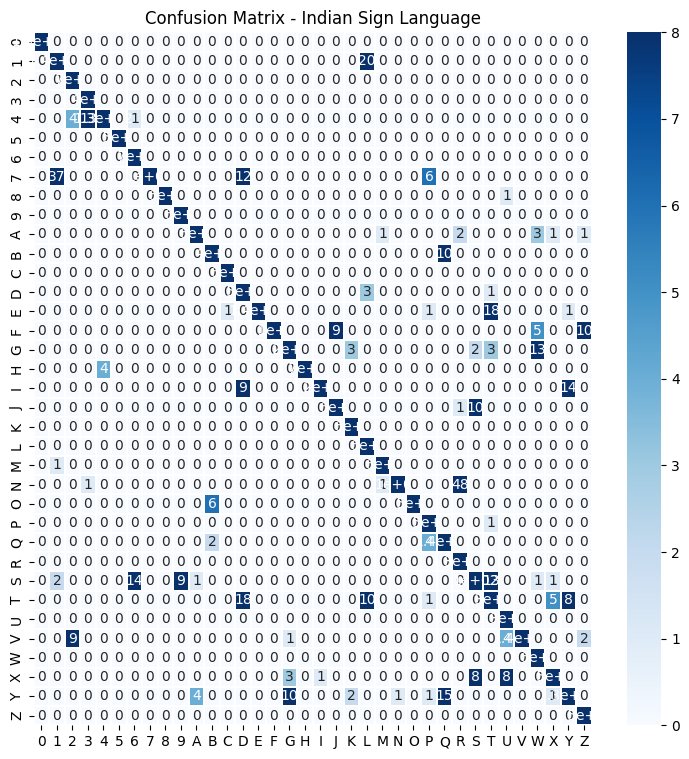

In [70]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]
print(labels)
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cm, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

Confusion Matrix:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

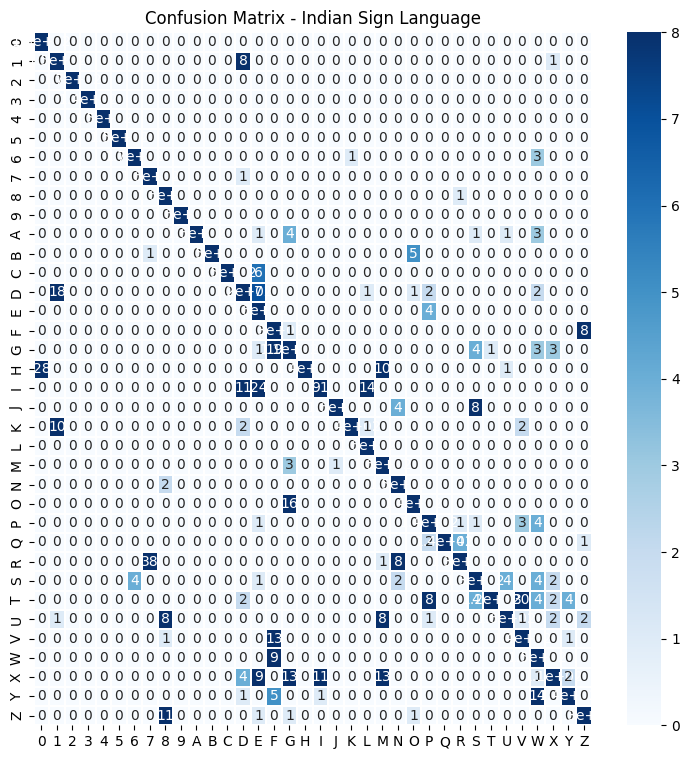

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=7)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]
print(labels)
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cm, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

Confusion Matrix:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

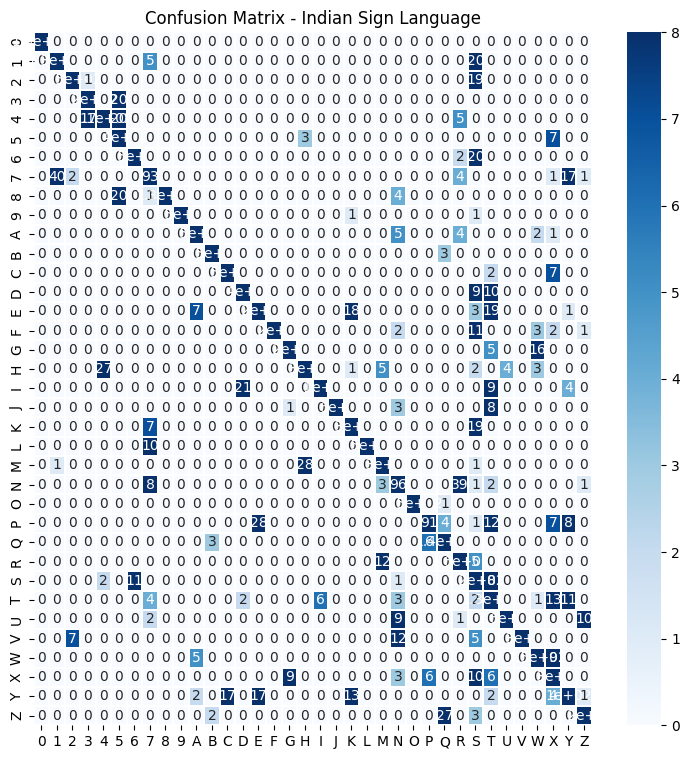

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]
print(labels)
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cm, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

Confusion Matrix:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

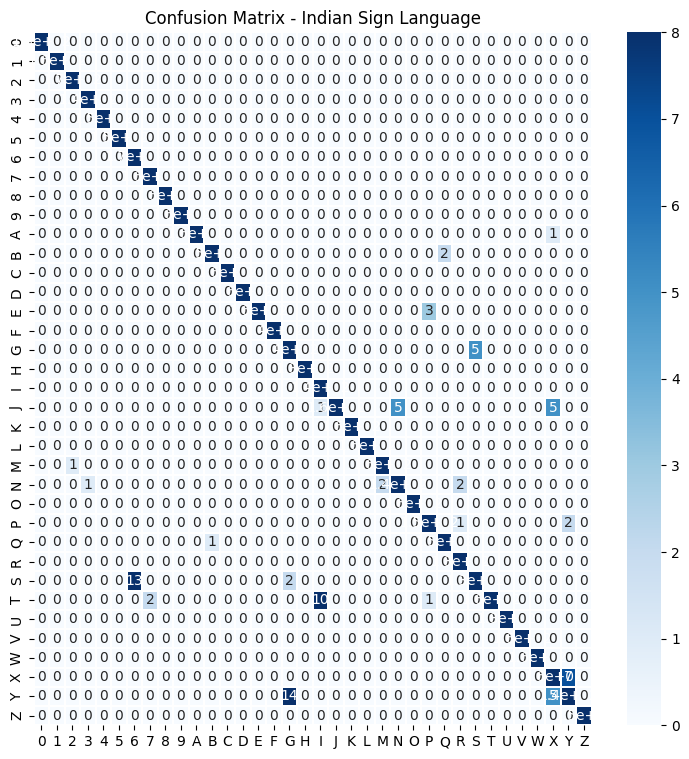

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the SVM Classifier
svm = SVC(C=1, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

# Predict on the test set
y_pred = svm.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]
print(labels)
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cm, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

Confusion Matrix:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

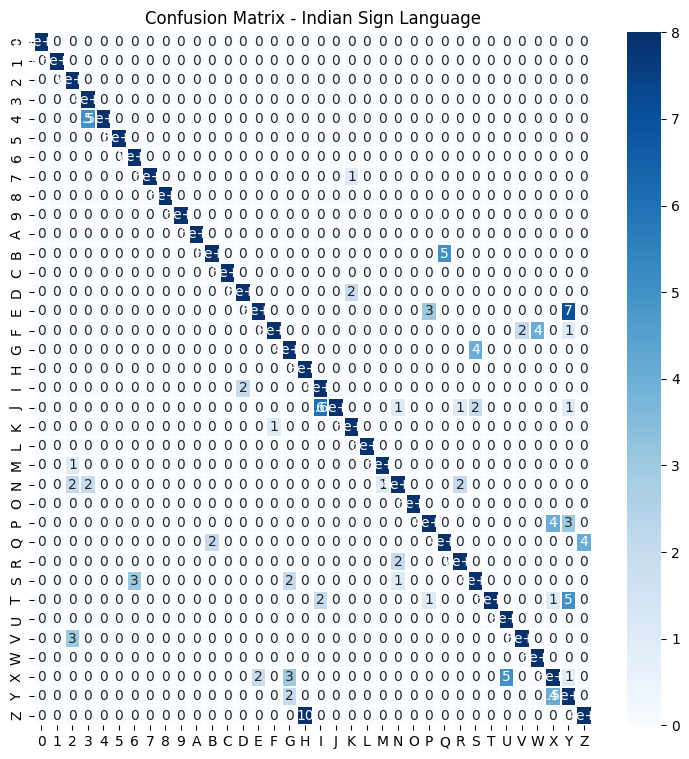

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = classifier.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]
print(labels)
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cm, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

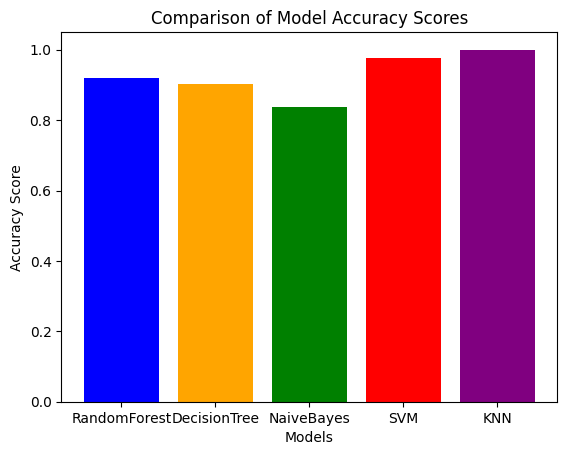

In [8]:
import matplotlib.pyplot as plt

# Accuracy scores of different models
models = ['RandomForest', 'DecisionTree', 'NaiveBayes', 'SVM', 'KNN']
accuracy_scores = [clssifier.score(x_test, y_pred), lassifier.score(x_test, y_pred),
                   classifie.score(x_test, y_pred), svm.score(x_test, y_pred),
                   classifier.score(x_test, y_pred)]

colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plotting the accuracy scores
plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.show()


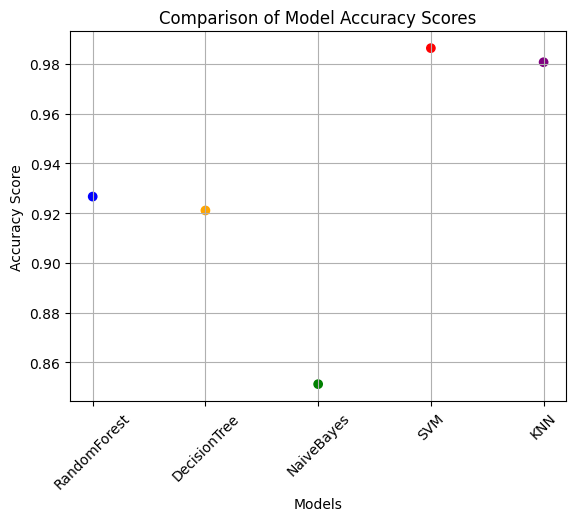

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores of different models
models = ['RandomForest', 'DecisionTree', 'NaiveBayes', 'SVM', 'KNN']
accuracy_scores = [clssifier.score(x_test, y_pred), lassifier.score(x_test, y_pred),
                   classifie.score(x_test, y_pred), svm.score(x_test, y_pred),
                   classifier.score(x_test, y_pred)]

# Generating x-axis positions for scatter plot
x_pos = np.arange(len(models))

# Define colors for each model
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plotting the scatter plot with colors
plt.scatter(x_pos, accuracy_scores, c=colors)
plt.xticks(x_pos, models, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.grid(True)
plt.show()


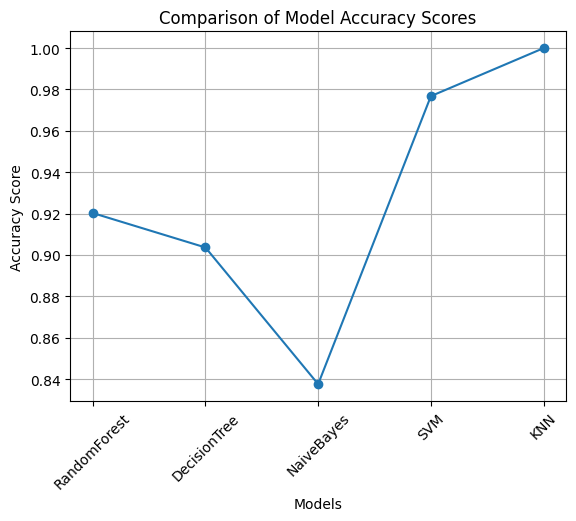

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores of different models
models = ['RandomForest', 'DecisionTree', 'NaiveBayes', 'SVM', 'KNN']
accuracy_scores = [clssifier.score(x_test, y_pred), lassifier.score(x_test, y_pred),
                   classifie.score(x_test, y_pred), svm.score(x_test, y_pred),
                   classifier.score(x_test, y_pred)]

# Generating x-axis positions for line plot
x_pos = np.arange(len(models))

# Plotting the line graph
plt.plot(x_pos, accuracy_scores, marker='o')
plt.xticks(x_pos, models, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.grid(True)
plt.show()


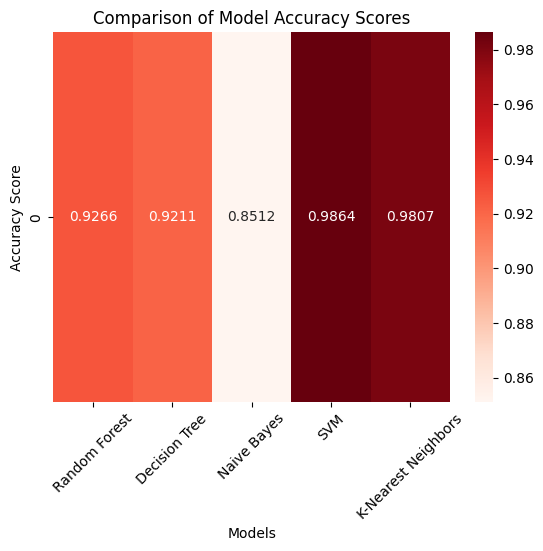

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Accuracy scores of different models
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors']
accuracy_scores =[clssifier.score(x_test, y_pred), lassifier.score(x_test, y_pred),
                   classifie.score(x_test, y_pred), svm.score(x_test, y_pred),
                   classifier.score(x_test, y_pred)]

# Create a 2D array for heatmap
heatmap_data = np.array(accuracy_scores).reshape(1, len(models))

# Plotting the heatmap
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.4f')
plt.xticks(np.arange(len(models)) + 0.5, models, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.show()


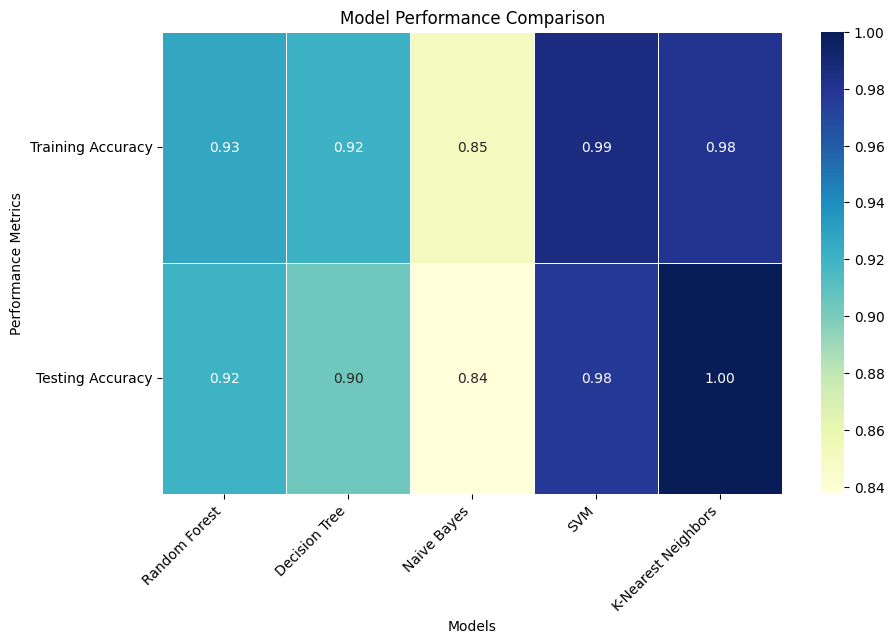

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores and F1 scores of different models
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors']
training_accuracy = [clssifier.score(x_train, y_train), lassifier.score(x_train, y_train),
                   classifie.score(x_train, y_train), svm.score(x_train, y_train),
                   classifier.score(x_train, y_train)]
testing_accuracy = [clssifier.score(x_test, y_pred), lassifier.score(x_test, y_pred),
                   classifie.score(x_test, y_pred), svm.score(x_test, y_pred),
                   classifier.score(x_test, y_pred)]



# Create a 2D array for the heatmap
heatmap_data = np.array([training_accuracy, testing_accuracy])

# Define the labels for x-axis and y-axis
metrics = ['Training Accuracy', 'Testing Accuracy']

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, ax=ax)

# Set the x-axis and y-axis labels
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_yticklabels(metrics, rotation=0)
ax.set_xlabel('Models')
ax.set_ylabel('Performance Metrics')

# Set the title of the heatmap
ax.set_title('Model Performance Comparison')

# Display the plot
plt.show()


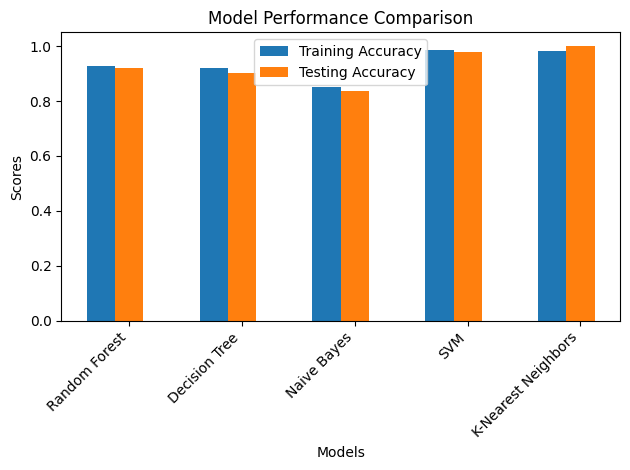

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores and F1 scores of different models
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors']
training_accuracy = [clssifier.score(x_train, y_train), lassifier.score(x_train, y_train),
                   classifie.score(x_train, y_train), svm.score(x_train, y_train),
                   classifier.score(x_train, y_train)]
testing_accuracy = [clssifier.score(x_test, y_pred), lassifier.score(x_test, y_pred),
                   classifie.score(x_test, y_pred), svm.score(x_test, y_pred),
                   classifier.score(x_test, y_pred)]

# Set the position of the bars on the x-axis
bar_width = 0.25
index = np.arange(len(models))

# Define the colors for the bars
colors = ['#1f77b4', '#ff7f0e']

# Plotting the bar graph
plt.bar(index, training_accuracy, bar_width, label='Training Accuracy', color=colors[0])
plt.bar(index + bar_width, testing_accuracy, bar_width, label='Testing Accuracy', color=colors[1])


# Customizing the x-axis labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(index + bar_width, models, rotation=45, ha='right')

# Adding a legend
plt.legend()

# Setting the title
plt.title('Model Performance Comparison')

# Displaying the plot
plt.tight_layout()
plt.show()
